In [1]:
using Revise
using MDToolbox, PyPlot, Statistics, LinearAlgebra
PyPlot.plt.style.use("seaborn-colorblind")
ENV["COLUMNS"] = 110; #display width for MDToolbox

-----

In [99]:
pdb_xtal = mdload("/data/higashi/new_4idl/like_ALL_4IDL/ground_truth.pdb");

pdb_init = mdload("/data/higashi/new_4idl/like_ALL_4IDL/prot.pdb");
ta1 = mdload("/data/higashi/new_4idl/like_ALL_4IDL/06_grest_production/run_param1_1to6_s10.nc");
ta = [pdb_init; ta1];

In [100]:
pdb_xtal = pdb_xtal["(atomname CA) and (resid 100:114)"]
pdb_init = pdb_init["(atomname CA) and (resid 100:114)"]
ta = ta["(atomname CA) and (resid 100:114)"];
#ta = ta["(atomname CA) and (resid 20:125)"];

In [101]:
x_xtal = MDToolbox.compute_distancemap(pdb_xtal);
x_init = MDToolbox.compute_distancemap(pdb_init);

In [102]:
X = MDToolbox.compute_distancemap(ta);

In [103]:
X_mean = mean(X, dims=1)

1×78 Matrix{Float64}:
 8.78793  10.4553  12.445  12.9944  11.8431  10.1369  …  11.4685  12.1765  9.24763  10.1521  7.46825

In [104]:
X .= X .- X_mean
e = eigen(X' * X ./ size(X, 1))
lambda = e.values[end:-1:1]
W = e.vectors[:, end:-1:1]
P = X * W

60001×78 Matrix{Float64}:
  -5.3691    -25.8031  15.5576    -9.32137    3.12309   …   0.0461052     0.105414    -0.0395149
  -6.86165   -25.9469   6.67653  -10.4824     6.09964       0.00579463    0.0131127    0.0252565
  -6.73093   -25.5125   6.57962   -9.87996    5.61609       0.0316257     0.0304809    0.0233927
  -7.23543   -23.8265  17.9384    -8.10042    1.25399      -0.0532574    -0.0255227   -0.0188223
  -6.43105   -23.2371  17.6915    -8.34323    2.82558      -0.0730789    -0.00399657  -0.0267232
  -8.08456   -21.8824  18.8291    -8.02946    2.48031   …  -0.0752452     0.00926514  -0.0176216
  -6.98551   -22.8502  18.1421    -7.43469    1.37334      -0.0437597     0.00959844  -0.0264751
  -0.570841  -25.0325  -6.57959    1.59205   -3.42453       0.0853517     0.0675336   -0.12402
  -0.668144  -24.033   -5.77594    2.35264   -3.17617       0.0570281     0.0899823   -0.0975583
  -1.27334   -25.9949  -6.37879    2.50393   -4.06258       0.0698703     0.0922162   -0.107123
  -1.85

In [105]:
p_xtal = (x_xtal .- X_mean) * W
p_init = (x_init .- X_mean) * W

1×78 Matrix{Float64}:
 -5.3691  -25.8031  15.5576  -9.32137  3.12309  -0.132172  …  0.00440894  0.0461052  0.105414  -0.0395149

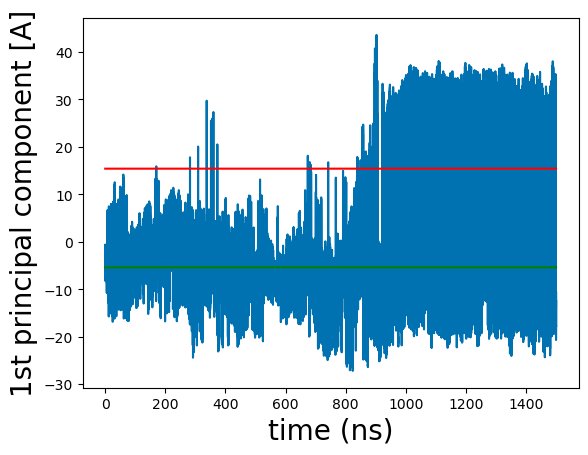

In [106]:
plot((1:size(P, 1)).*0.25*0.1, P[:, 1])
plot((1:size(P, 1)).*0.25*0.1, ones(size(P,1))*p_xtal[1], color=:red)
plot((1:size(P, 1)).*0.25*0.1, ones(size(P,1))*p_init[1], color=:green)
ylabel("1st principal component [A]",fontsize=20);
xlabel("time (ns)",fontsize=20);
savefig("timeseries_grest.png", dpi=350, bbox_inches="tight");

In [107]:
P

60001×78 Matrix{Float64}:
  -5.3691    -25.8031  15.5576    -9.32137    3.12309   …   0.0461052     0.105414    -0.0395149
  -6.86165   -25.9469   6.67653  -10.4824     6.09964       0.00579463    0.0131127    0.0252565
  -6.73093   -25.5125   6.57962   -9.87996    5.61609       0.0316257     0.0304809    0.0233927
  -7.23543   -23.8265  17.9384    -8.10042    1.25399      -0.0532574    -0.0255227   -0.0188223
  -6.43105   -23.2371  17.6915    -8.34323    2.82558      -0.0730789    -0.00399657  -0.0267232
  -8.08456   -21.8824  18.8291    -8.02946    2.48031   …  -0.0752452     0.00926514  -0.0176216
  -6.98551   -22.8502  18.1421    -7.43469    1.37334      -0.0437597     0.00959844  -0.0264751
  -0.570841  -25.0325  -6.57959    1.59205   -3.42453       0.0853517     0.0675336   -0.12402
  -0.668144  -24.033   -5.77594    2.35264   -3.17617       0.0570281     0.0899823   -0.0975583
  -1.27334   -25.9949  -6.37879    2.50393   -4.06258       0.0698703     0.0922162   -0.107123
  -1.85

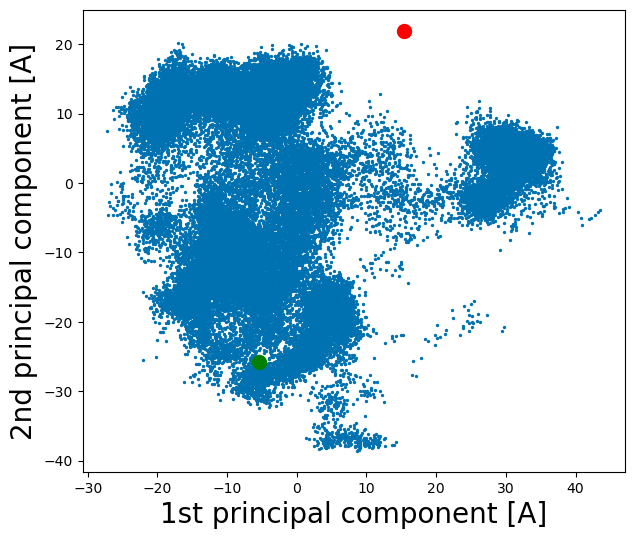

In [108]:
fig, ax = subplots(figsize=(7, 6));
ax.scatter(P[:, 1], P[:, 2], s=2.0);
ax.scatter(p_xtal[1], p_xtal[2], s=100.0, color=:red);
ax.scatter(p_init[1, 1], p_init[1, 2], s=100.0, color=:green);
xlabel("1st principal component [A]",fontsize=20);
ylabel("2nd principal component [A]",fontsize=20);

# detailed options (not necessary, just for reference)
#ax.set(xlim=[-20, 10], ylim=[-10, 15]);
#ax.xaxis.set_tick_params(which="major",labelsize=15);
#ax.yaxis.set_tick_params(which="major",labelsize=15);
#ax.grid(linestyle="--", linewidth=0.5);
#tight_layout();

savefig("scatter_grest.png", dpi=350);

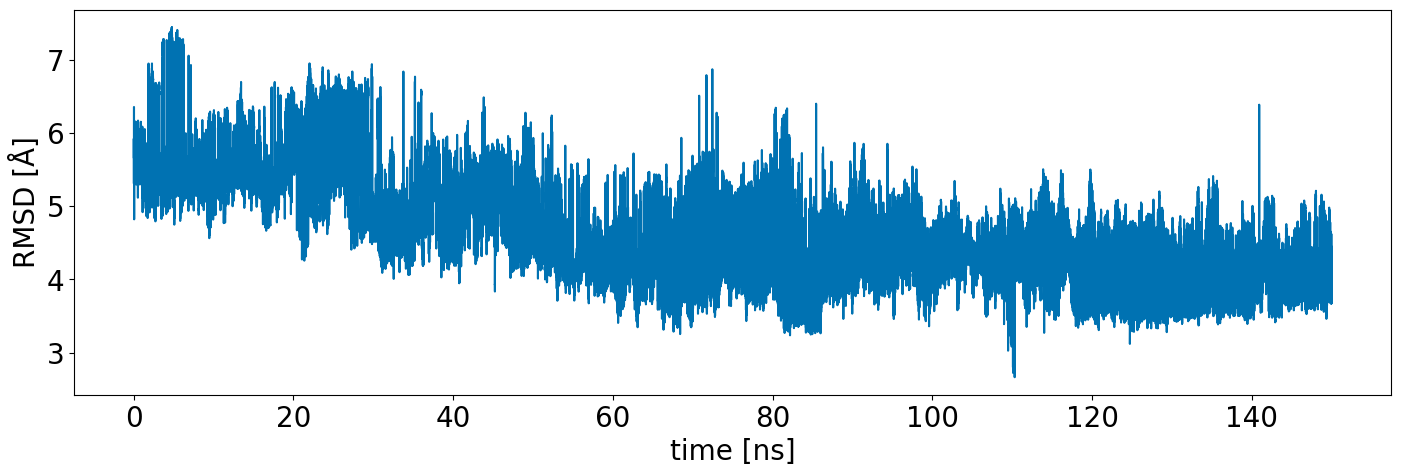

In [109]:
figure(figsize=(17,5),)
ta_fitted = superimpose(pdb_xtal, ta);
rmsd = compute_rmsd(pdb_xtal, ta_fitted)
plot((1:size(P, 1)).*0.025*0.1, rmsd)
ylabel("RMSD [Å]",fontsize=20);
xlabel("time [ns]",fontsize=20);
xticks(fontsize=20);
yticks(fontsize=20);
#xlim([0, 140])
#ylim([1.1, 8.0])
savefig("rmsd_4idl_likeALL.png", dpi=350, bbox_inches="tight");
#ylim([1.0, 8.0])

In [110]:
ta_fitted = superimpose(pdb_xtal, ta);
rmsd = compute_rmsd(pdb_xtal, ta_fitted)

60001-element Vector{Float64}:
 5.667322157263637
 5.919313369805772
 5.881998976047597
 5.433954456057797
 5.427480446091853
 5.307867894622989
 5.35456423391473
 6.2334795761027255
 6.073766666722026
 6.253285866864612
 6.352497431439589
 5.852795389936455
 5.917173390429272
 ⋮
 3.7485116811105472
 3.8065259478790043
 4.620210345150153
 4.613545132788599
 3.691889441126387
 3.6943222078802873
 3.7940022762108416
 3.7575119969448725
 3.673506241441544
 3.811633517746235
 4.449041254049616
 4.4061861514972